In [1]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 9.6 MB/s 
     |████████████████████████████████| 4.2 MB 45.2 MB/s 
     |████████████████████████████████| 362 kB 66.5 MB/s 
     |████████████████████████████████| 1.2 MB 55.6 MB/s 
     |████████████████████████████████| 197 kB 70.2 MB/s 
     |████████████████████████████████| 60 kB 9.0 MB/s 
     |████████████████████████████████| 140 kB 59.1 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.5 MB/s 
     |████████████████████████████████| 212 kB 70.1 MB/s 
     |████████████████████████████████| 596 kB 71.9 MB/s 
     |████████████████████████████████| 127 kB 76.9 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 271 kB 76.4 MB/s 
     |████████████████████████████████| 144 kB 74.0 MB/s 
     |████████████████████████████████

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('fruits')
if not path.exists():
  path.mkdir()

In [4]:
fruit_types = "dragon fruit", "jackfruit", "mangosteen", "durian", "tamarind", "rambutan", "custard apple", "rose apple", "pomelo", "sapodilla", "salak fruit", "thai bananas", "nam dok mai mango"

In [5]:
for f in fruit_types:
  dest = (path/f)
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(f"{f}", max_images=10)
  download_images(dest, urls=results)

fns = get_image_files(path)
print(fns)

[Path('fruits/nam dok mai mango/00000008.jpg'), Path('fruits/nam dok mai mango/00000005.jpg'), Path('fruits/nam dok mai mango/00000002.jpg'), Path('fruits/nam dok mai mango/00000000.jpg'), Path('fruits/nam dok mai mango/00000006.jpg'), Path('fruits/nam dok mai mango/00000007.jpg'), Path('fruits/nam dok mai mango/00000004.jpg'), Path('fruits/nam dok mai mango/00000009.jpg'), Path('fruits/nam dok mai mango/00000001.png'), Path('fruits/nam dok mai mango/00000003.jpg'), Path('fruits/tamarind/00000001.jpg'), Path('fruits/tamarind/00000008.jpg'), Path('fruits/tamarind/00000005.jpg'), Path('fruits/tamarind/00000004.png'), Path('fruits/tamarind/00000002.jpg'), Path('fruits/tamarind/00000000.jpg'), Path('fruits/tamarind/00000006.jpg'), Path('fruits/tamarind/00000007.jpg'), Path('fruits/tamarind/00000009.jpg'), Path('fruits/tamarind/00000003.jpg'), Path('fruits/mangosteen/00000001.jpg'), Path('fruits/mangosteen/00000008.jpg'), Path('fruits/mangosteen/00000005.jpg'), Path('fruits/mangosteen/00000

In [6]:
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [7]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
fruits = fruits.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [9]:
dls = fruits.dataloaders(path)

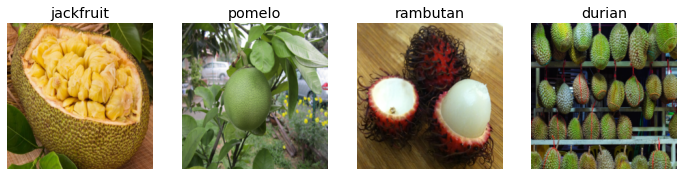

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)